In [85]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
import cv2 
# import recordlinkage

# import matplotlib.pyplot as plt
# # from torchvision import datasets, transforms
from torch.utils.data import DataLoader
# import torch.nn as nn
# import torch.nn.functional as F
# import torch.optim as optim
import torch
from tensorflow.keras.layers import  Conv2D, MaxPooling2D, Flatten, Dense
import os

import seaborn as sns
sns.set(style="darkgrid")
from sklearn import preprocessing

import tensorflow as tf
# from tensorflow import image_dataset_from_directory
from tensorflow.keras import layers
from tensorflow.keras.preprocessing import image

from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
# Link to data on MoMA github
mydata_csv_url = 'https://media.githubusercontent.com/media/MuseumofModernArt/collection/master/Artworks.csv'

In [6]:
# load the data from local host
df = pd.read_csv('../data/artworks.csv')

# remove NAs from medium column
df = df.dropna(subset=['Medium', "ThumbnailURL"])

In [7]:
# Create target column
lith_condition = df['Medium'].str.lower().str.contains('lithograph')
df['Target'] = lith_condition

In [8]:
df = df[['ObjectID', 'ThumbnailURL', 'Target']]
df.head()

,ObjectID,ThumbnailURL,Target
0,2,http://www.moma.org/media/W1siZiIsIjU5NDA1Il0s...,False
1,3,http://www.moma.org/media/W1siZiIsIjk3Il0sWyJw...,False
2,4,http://www.moma.org/media/W1siZiIsIjk4Il0sWyJw...,False
3,5,http://www.moma.org/media/W1siZiIsIjEyNCJdLFsi...,False
4,6,http://www.moma.org/media/W1siZiIsIjEyNiJdLFsi...,False


Creating a column in the dataset with the image title as its saved to my local computer

In [9]:
number = df["ObjectID"]
end = ".jpg"

df["Image Title"] = (f"{number} + end").format(number=number,end=end)
                        

In [10]:
image_dir = os.path.join('../data/images/all/')
image_dir


'../data/images/all/'

In [11]:
train_dir = os.path.join('../data/images/all/train/true')

In [12]:
filenames = os.listdir(train_dir)
filenames

['5109.jpg',
 '6366.jpg',
 '9041.jpg',
 '6414.jpg',
 '8439.jpg',
 '5135.jpg',
 '7722.jpg',
 '8377.jpg',
 '5647.jpg',
 '7050.jpg',
 '6428.jpg',
 '7736.jpg',
 '8388.jpg',
 '10490.jpg',
 '7087.jpg',
 '5684.jpg',
 '6164.jpg',
 '6602.jpg',
 '5479.jpg',
 '6170.jpg',
 '7246.jpg',
 '11201.jpg',
 '7534.jpg',
 '8161.jpg',
 '7252.jpg',
 '11573.jpg',
 '4983.jpg',
 '5445.jpg',
 '10686.jpg',
 '8834.jpg',
 '8820.jpg',
 '406.jpg',
 '8808.jpg',
 '6825.jpg',
 '4940.jpg',
 '6010.jpg',
 '5519.jpg',
 '10057.jpg',
 '8983.jpg',
 '7468.jpg',
 '5525.jpg',
 '7332.jpg',
 '8767.jpg',
 '5243.jpg',
 '6986.jpg',
 '8773.jpg',
 '7326.jpg',
 '11407.jpg',
 '8940.jpg',
 '6979.jpg',
 '4808.jpg',
 '8968.jpg',
 '6212.jpg',
 '5069.jpg',
 '11177.jpg',
 '6548.jpg',
 '11188.jpg',
 '5914.jpg',
 '5082.jpg',
 '5096.jpg',
 '5929.jpg',
 '7858.jpg',
 '5083.jpg',
 '11189.jpg',
 '5054.jpg',
 '7643.jpg',
 '11176.jpg',
 '5040.jpg',
 '5726.jpg',
 '8202.jpg',
 '6207.jpg',
 '5068.jpg',
 '6575.jpg',
 '8558.jpg',
 '6944.jpg',
 '4821.jpg',
 '6

In [13]:
df_images = pd.DataFrame(filenames,
                      columns=['Image Path'])

In [14]:
df_images

,Image Path
0,5109.jpg
1,6366.jpg
2,9041.jpg
3,6414.jpg
4,8439.jpg
...,...
1796,6343.jpg
1797,6425.jpg
1798,5662.jpg
1799,8346.jpg


In [15]:
# filenames = os.listdir(original_train)
# categories = []


In [16]:
# df["Image title?"] = ("df[ObjectID] + .jpg")
# df
# print (df["ObjectID"] + ".jpg")

In [45]:
# string interpolation ??



In [66]:
lith_dir = os.path.join('../data/images/all/train/true/')

nonlith_dir = os.path.join('../data/images/all/train/false/')

In [67]:
lith_names = os.listdir(lith_dir)

nonlith_names = os.listdir(nonlith_dir)

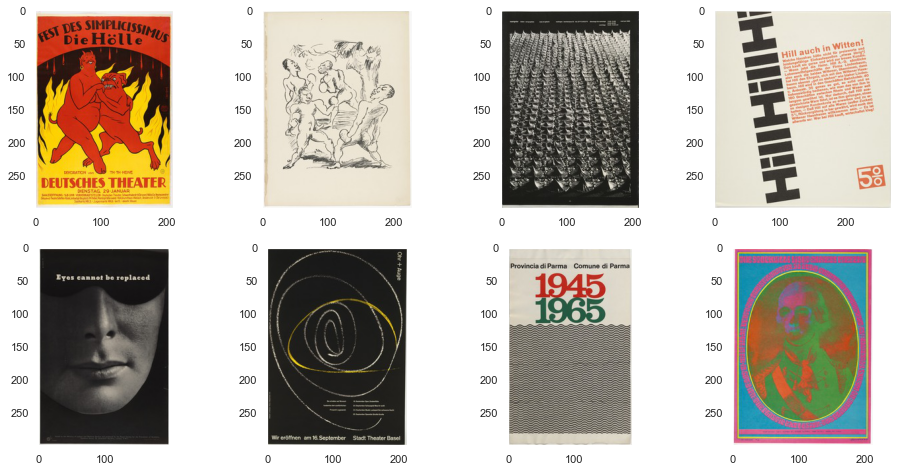

In [72]:
# These are all lithographs!

rows = 2
cols = 4
fig = plt.gcf()
fig.set_size_inches(cols * 4, rows * 4)

fig = plt.gcf()

pic_index = 1
pic_index += 8
next_image = [os.path.join(lith_dir, fname) 
                for fname in lith_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_image):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(rows, cols, i + 1, )
  plt.grid(False)

#   sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)

  plt.imshow(img)

plt.show()

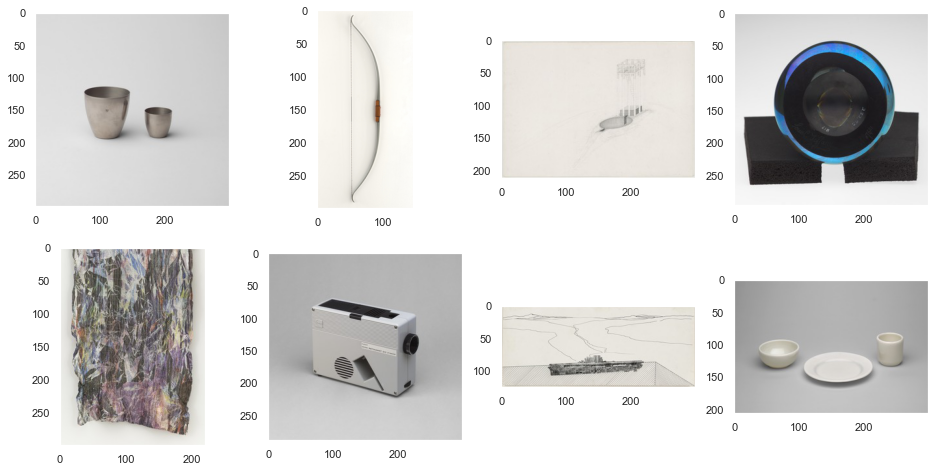

In [73]:
# These are all NOT lithographs!

rows = 2
cols = 4
fig = plt.gcf()
fig.set_size_inches(cols * 4, rows * 4)

fig = plt.gcf()

pic_index = 1
pic_index += 8
next_image = [os.path.join(nonlith_dir, fname) 
                for fname in nonlith_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_image):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(rows, cols, i + 1, )
  plt.grid(False)

#   sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)

  plt.imshow(img)

plt.show()

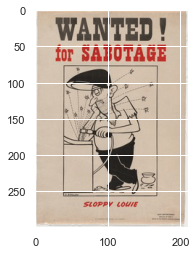

In [74]:
train_dir = os.path.join('../data/images/all/train/')
img = image.load_img("../data/images/all/train/true/5109.jpg")
plt.imshow(img)

In [75]:
# shape of the image as is, without ".shape" shows the array
cv2.imread("../data/images/all/train/true/5109.jpg").shape

(300, 211, 3)

Right now all of the images will be in full color (RGB) making them 3 dimensional. Later on we will convert to greyscale.

In [76]:
train = ImageDataGenerator(rescale = 1/255)
test = ImageDataGenerator(rescale = 1/255)

In [78]:
train_dataset.class_indices

{'false': 0, 'true': 1}

In [91]:
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "../data/images/all/train/",
    label_mode="int",
    class_names=None,
    color_mode="grayscale",
    batch_size=25,
    image_size=(64, 64),
)

# maybe this is redundent? seems to do the same thing
# train_dataset = train.flow_from_directory("../data/images/all/train/", 
#                                           target_size = (64,64,1),
#                                           batch_size = 25,
#                                           class_mode = "binary",
#                                           color_mode="grayscale"
#                                          )

Found 3600 files belonging to 2 classes.


In [87]:
# Building the model

model_cnn = tf.keras.models.Sequential([
    Conv2D(32, (3, 3), 
           activation='relu', 
           input_shape=(64, 64, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')    
])

model_cnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 62, 62, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               802944    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                

In [93]:
model_cnn.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [100]:
history_cnn = model_cnn.fit(train_dataset, 
                            steps_per_epoch =12,
                            epochs=10)

Epoch 1/10
12/12 [==============================] - 1s 59ms/step - loss: 0.3315 - accuracy: 0.8467
Epoch 2/10
12/12 [==============================] - 1s 59ms/step - loss: 0.4426 - accuracy: 0.8067
Epoch 3/10
12/12 [==============================] - 1s 59ms/step - loss: 0.2978 - accuracy: 0.8600
Epoch 4/10
12/12 [==============================] - 1s 58ms/step - loss: 0.2528 - accuracy: 0.8967
Epoch 5/10
12/12 [==============================] - 1s 58ms/step - loss: 0.2191 - accuracy: 0.9233
Epoch 6/10
12/12 [==============================] - 1s 58ms/step - loss: 0.2126 - accuracy: 0.9200
Epoch 7/10
12/12 [==============================] - 1s 59ms/step - loss: 0.2237 - accuracy: 0.9100
Epoch 8/10
12/12 [==============================] - 1s 63ms/step - loss: 0.2284 - accuracy: 0.9067
Epoch 9/10
12/12 [==============================] - 1s 57ms/step - loss: 0.2277 - accuracy: 0.9100
Epoch 10/10
12/12 [==============================] - 1s 55ms/step - loss: 0.2340 - accuracy: 0.9067
